# Searching, Sorting, and Timing

## Agenda

1. Timing
2. Prelude: Timing list indexing
3. Linear search
4. Binary search
5. Insertion sort

In [2]:
### This is how to do a foreach loop ###
def foo(guesses):
    sum = 0
    for x in guesses:
        sum += x
    return sum
foo(x for x in range(10000))

49995000

## 1. Timing

In [10]:
import time
time.time()

1505335070.2069545

In [11]:
#alternatively:
from time import time
time()

1505335070.4157913

In [34]:
from time import time
start = time()
sum = 0
for i in range(0,100000):
    sum += 1
end = time()
print(end-start)

0.016065597534179688


In [44]:
def sumto():
    sum = 0
    for i in range(100000):
        sum += i

In [49]:
def timeit(fn, times = 100):
    duration = 0
    for _ in range(times):
        start = time()
        fn()
        end = time()
        duration += end - start
    return duration / times

In [52]:
timeit(sumto)

0.007321140766143799

In [60]:
from timeit import timeit ###this is how to time functions
timeit('"-".join(str(n) for n in range(100))', number = 10000) / 10000

3.3231473291269255e-05

In [63]:
%timeit "-".join(str(n) for n in range(100))

10000 loops, best of 3: 30 µs per loop


## 2. Prelude: Timing list indexing

In [66]:
import timeit
timeit.timeit(stmt='lst[0]', setup='lst=[0] * 10**6')

0.04402052581906446

In [67]:
timeit.timeit(stmt='lst[10**6-1]',
              setup='lst=[0] * 10**6')

0.05514032389515933

In [74]:
import random
size = 10**3
times = [0] * size
lst   = [0] * size
for _ in range(100):
    for i in range(size):
        times[i] += timeit.timeit(stmt='lst[{}]'.format(i), globals=globals(), number=10)

In [76]:
times

[9.16542841196133e-05,
 8.217280731059873e-05,
 7.861725191560254e-05,
 7.545675987330469e-05,
 7.585182208913466e-05,
 7.782713009873987e-05,
 7.743206811028358e-05,
 9.323453093657008e-05,
 7.545675998699153e-05,
 7.743206822397042e-05,
 7.664194447443151e-05,
 7.94073761198888e-05,
 7.387651351109525e-05,
 7.545675998699153e-05,
 7.703700680394832e-05,
 7.94073755514546e-05,
 7.506169856696943e-05,
 7.782712975767936e-05,
 7.664194629342092e-05,
 7.348145220475999e-05,
 7.703700578076678e-05,
 9.323453161869111e-05,
 7.269132913734211e-05,
 7.664194515655254e-05,
 8.730860724881495e-05,
 7.545676055542572e-05,
 0.00010785180950279027,
 7.427157538586471e-05,
 7.427157572692522e-05,
 7.506169856696943e-05,
 7.387651407952944e-05,
 7.506169936277729e-05,
 7.506169845328259e-05,
 0.00010548144075528398,
 7.585182106595312e-05,
 7.071602135511057e-05,
 0.0001015308242813262,
 7.62468836228436e-05,
 7.466663657851313e-05,
 7.506169868065626e-05,
 7.506170038595883e-05,
 7.743206890609144

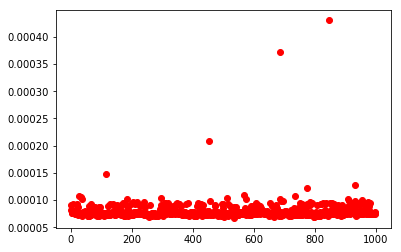

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

Accessing an element in a list by index always takes the same amount of time, regardless of position. I.e., indexing incurs a *constant time* delay.

How? **A Python list uses an array as its underlying data storage mechanism.** To access an element in an array, the interpreter:

1. Computes an *offset* into the array by multiplying the element's index by the size of each array entry (which are uniformly sized, since they are merely *references* to the actual elements)
2. Adds the offset to the *base address* of the array

## 3. Linear Search

Task: to locate an element with a given value in a list (array).

In [50]:
def index(lst, x):
    for i in range(len(lst)):
        if lst[i] == x:
            return i
    else: ## attached to loop & if loop returns nothing, run else
        return None

In [82]:
lst = list(range(100))
index(lst, 10)

10

In [83]:
index(lst, 99)

99

In [84]:
index(lst, -1)

In [11]:
def index(lst, x):
    for i in range(len(lst)):
        if lst[i] == x:
            return i
    else: ## attached to loop & if loop returns nothing, run else
        raise ValueError(x)

In [12]:
index(lst, 10)

10

In [13]:
index(lst, -1)

ValueError: -1

In [14]:
try:
    print('Value found at', index(lst, -1))
except ValueError as e:
    print('Value not found:', e)

Value not found: -1


In [15]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=100))

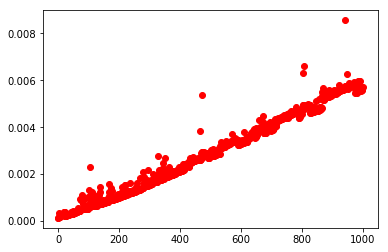

In [16]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 4. Binary search

Task: to locate an element with a given value in a list (array) whose contents are *sorted in ascending order*.

In [17]:
def index(lst, x):
    # assume that lst is sorted!!!
    lo = 0
    hi = len(lst)
    while lo<hi:
        mid = (hi+lo)//2
        print("Searching lst[{}]".format(mid))
        if lst[mid] == x:
            return mid
        elif lst[mid]>x:
            hi = mid
        else:
            lo = mid+1
    else: raise ValueError(x)

In [18]:
lst = list(range(1000))
index(lst, 10)

Searching lst[500]
Searching lst[250]
Searching lst[125]
Searching lst[62]
Searching lst[31]
Searching lst[15]
Searching lst[7]
Searching lst[11]
Searching lst[9]
Searching lst[10]


10

In [19]:
index(lst, 999)

Searching lst[500]
Searching lst[750]
Searching lst[875]
Searching lst[938]
Searching lst[969]
Searching lst[985]
Searching lst[993]
Searching lst[997]
Searching lst[999]


999

In [20]:
index(lst, -1)

Searching lst[500]
Searching lst[250]
Searching lst[125]
Searching lst[62]
Searching lst[31]
Searching lst[15]
Searching lst[7]
Searching lst[3]
Searching lst[1]
Searching lst[0]


ValueError: -1

In [43]:
for i in range(len(lst)):
    assert(i == index(lst, i))

Searching lst[500]
Searching lst[250]
Searching lst[125]
Searching lst[62]
Searching lst[31]
Searching lst[15]
Searching lst[7]
Searching lst[3]
Searching lst[1]
Searching lst[0]
Searching lst[500]
Searching lst[250]
Searching lst[125]
Searching lst[62]
Searching lst[31]
Searching lst[15]
Searching lst[7]
Searching lst[3]
Searching lst[1]
Searching lst[500]
Searching lst[250]
Searching lst[125]
Searching lst[62]
Searching lst[31]
Searching lst[15]
Searching lst[7]
Searching lst[3]
Searching lst[1]
Searching lst[2]
Searching lst[500]
Searching lst[250]
Searching lst[125]
Searching lst[62]
Searching lst[31]
Searching lst[15]
Searching lst[7]
Searching lst[3]
Searching lst[500]
Searching lst[250]
Searching lst[125]
Searching lst[62]
Searching lst[31]
Searching lst[15]
Searching lst[7]
Searching lst[3]
Searching lst[5]
Searching lst[4]
Searching lst[500]
Searching lst[250]
Searching lst[125]
Searching lst[62]
Searching lst[31]
Searching lst[15]
Searching lst[7]
Searching lst[3]
Searching l

In [52]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, x)',globals=globals(),number=1000))

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [49]:
import timeit
times = []
for size in range(100, 10000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='index(lst, 1)', globals=globals(),number=10000))

Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
Searching lst[6]
Searching lst[3]
Searching lst[1]
Searching lst[50]
Searching lst[25]
Searching lst[12]
S

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [ ]:
import timeit
import random
times = []
for e in range(5, 20):
    lst = list(range(2**e))
    times.append(timeit.timeit(stmt='index(lst, -1)',
                               globals=globals(),
                               number=100000))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 5. Insertion sort

Task: to sort the values in a given list (array) in ascending order.

In [56]:
import random
lst = list(range(100))

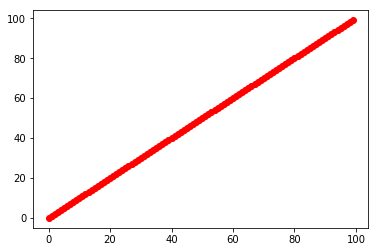

In [58]:
plt.plot(lst, 'ro')
plt.show()

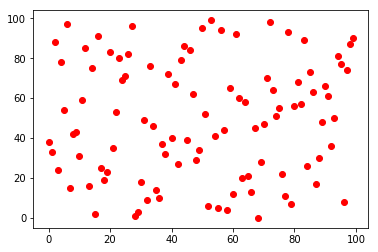

In [59]:
import random
lst = list(range(100))
random.shuffle(lst)
plt.plot(lst, 'ro')
plt.show()

In [69]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i,0,-1):
            if (lst[j]<lst[j-1]):
                lst[j],lst[j-1] = lst[j-1], lst[j] # swap the two using a,b = b , a
            else: break

In [70]:
insertion_sort(lst)

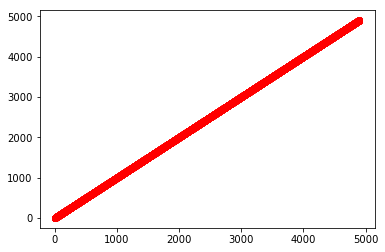

In [71]:
plt.plot(lst, 'ro')
plt.show()

In [72]:
import timeit
import random
times = []
for size in range(100, 5000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup='random.shuffle(lst)',
                               globals=globals(),
                               number=1))

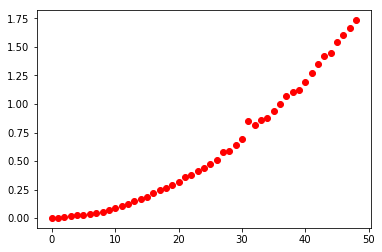

In [73]:
plt.plot(times, 'ro')
plt.show()